# PsyTrack Analysis for Categorization Task

This notebook is written to analyze behavioral data of mice performing a 2 choice categorization task. It loads the output of the matlab function getPsytrackStruct(x, filename, 3) from filename. 

In [63]:
import numpy as np
import psytrack as psy
from scipy.io import loadmat
import os
import math
from matplotlib import pyplot as plt

In [64]:
path = r"W:\Data\2AFC_Behavior\opto_136"
os.chdir(path)
mouse = loadmat("psytrack_3.mat")

In [65]:
ar = (mouse['inputs']);
y = (mouse['y']).flatten();
correct = mouse['correct'].flatten();
dayLength = mouse['dayLength'].flatten() ;
answer = mouse['answer'].flatten();

v = mouse['vars']
dkeys = [i[0] for i in v[0]]

inputs = dict.fromkeys(dkeys)

for idx, val in enumerate(inputs):
    inputs[val] = ar[0][idx]

d = {'inputs': inputs, 'y':y, 'correct': correct, 'dayLength': dayLength, 'answer': answer};

weights = dict.fromkeys(dkeys, 1)
weights['bias']=1
K = np.sum([weights[i] for i in weights.keys()])
hyper= {'sigInit': 2**4.,      
        'sigma': [2**-4.]*K,   
        'sigDay': 2**4.}
optList = ['sigma', 'sigDay']
print(weights)

{'correctLick': 1, 'lickChoice': 1, 'opto': 1, 'nogo': 1, 'lowStims': 1, 'highStims': 1, 'bias': 1}


In [66]:
hyp, evd, wMode, hess_info = psy.hyperOpt(d, hyper, weights, optList, hess_calc="All")
model = -2*evd + K*np.log(d['y'].shape[0])

In [67]:
trimLen = math.floor(d['y'].shape[0]/10)*10;
new_D = psy.trim(d, END=trimLen) 
xval_logli, xval_pL = psy.crossValidate(new_D, hyper, weights, optList, F=10, seed=41)

Running xval fold 10 of 10

In [68]:
mdic = {'weights':wMode, 'hyper': hyp, 'logEvd': evd, 'hess': hess_info, 'xval_logli':xval_logli, 'xval_pL': xval_pL}



from scipy.io import savemat
savemat("psytrack_weights2.mat", mdic)

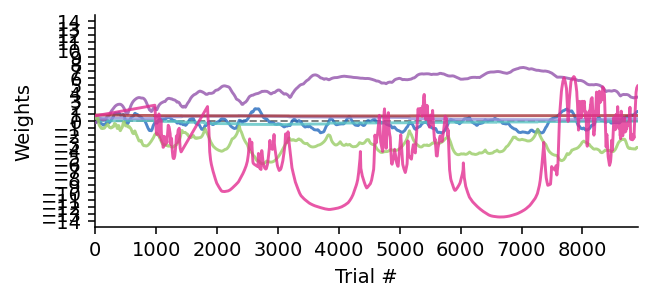

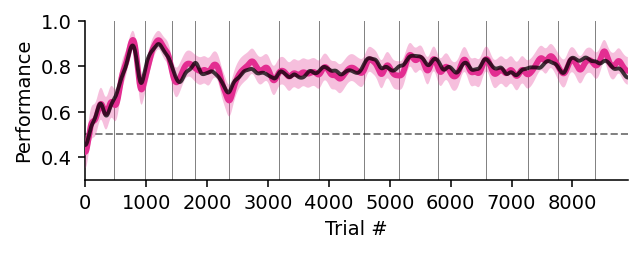

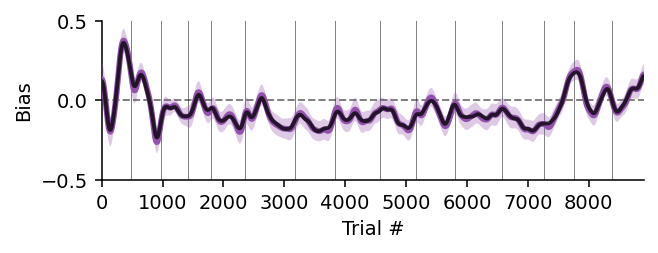

In [69]:
plt.rcParams['figure.dpi'] = 140
fig = psy.plot_weights(wMode)
fig_perf_xval = psy.plot_performance(new_D, xval_pL=xval_pL)
fig_bias_xval = psy.plot_bias(new_D, xval_pL=xval_pL)

In [47]:
COLORS = {'bias' : '#FAA61A', 
          's1' : "#A9373B", 's2' : "#2369BD", 
          's_a' : "#A9373B", 's_b' : "#2369BD", 
          'sR' : "#A9373B", 'sL' : "#2369BD",
          'cR' : "#A9373B", 'cL' : "#2369BD",
          'c' : '#59C3C3', 'h' : '#9593D9', 's_avg' : '#99CC66',
          'emp_perf': '#E32D91', 'emp_bias': '#9252AB'}
colors = {i: np.unique(list(COLORS.values()))[i] for i in range(K)}
print(colors)
print(np.unique(weights))

{0: '#2369BD', 1: '#59C3C3', 2: '#9252AB', 3: '#9593D9', 4: '#99CC66', 5: '#A9373B', 6: '#E32D91'}
[{'correctLick': 1, 'lickChoice': 1, 'opto': 1, 'nogo': 1, 'lowStims': 1, 'highStims': 1, 'bias': 1}]
